# KModes

In [104]:
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import numpy as np


## Fetch data & prepare trainingset
### Remove meaningless columns (same feature value for all languages)
- 143G
- 89A
- 90A

In [105]:
df_data = pd.read_csv('data/training_set.csv', sep=',', index_col=0) # read previously generated trainingset 
df_data = df_data.drop(['143G', '89A', '90A'], axis = 1) # remove meaningless data

rows = df_data.shape[0]

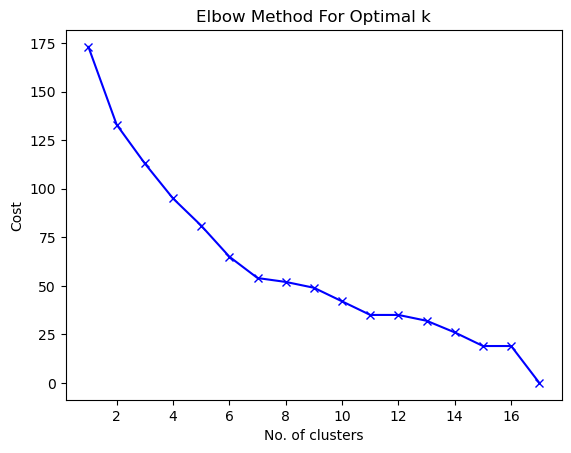

In [106]:
# Elbow curve to find optimal K
cost = []
K = range(1,rows + 1)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 10, verbose=0, random_state=7)
    # kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 10, verbose=0)
    kmode.fit_predict(df_data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

### Train kModes model
#### Number of clusters can be taken from chart above (ellbow)

In [107]:
model_config = {'k' : 7}

In [108]:
# Building the model with 3 clusters
kmode = KModes(n_clusters = model_config['k'], init = "random", n_init = 5, verbose=0, random_state=7)
clusters = kmode.fit_predict(df_data)
# clusters

df_result = df_data
df_result.insert(0, "Cluster", clusters, True)
df_result
# df_result.to_csv('data/result.csv')

,Cluster,53A,97A,87A,83A,82A,81A,95A,138A,112A,...,86A,96A,69A,51A,26A,72A,37A,92A,33A,101A
LANG_ID,,,,,,,,,,,,,,,,,,,,,
rus,6,7.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,...,2.0,4.0,4.0,1.0,2.0,4.0,5.0,3.0,2.0,1.0
cze,1,7.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,1.0,...,3.0,4.0,4.0,1.0,3.0,4.0,5.0,6.0,2.0,2.0
ger,5,6.0,5.0,1.0,3.0,1.0,7.0,5.0,2.0,2.0,...,2.0,5.0,2.0,1.0,2.0,4.0,1.0,6.0,2.0,1.0
iri,2,7.0,4.0,2.0,2.0,2.0,3.0,4.0,2.0,2.0,...,2.0,4.0,4.0,5.0,4.0,1.0,1.0,1.0,6.0,6.0
nor,3,7.0,3.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,...,3.0,4.0,2.0,1.0,2.0,4.0,3.0,6.0,2.0,1.0
ita,0,7.0,4.0,2.0,2.0,3.0,2.0,4.0,2.0,2.0,...,2.0,4.0,2.0,9.0,2.0,4.0,1.0,6.0,2.0,2.0
fre,4,7.0,4.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,...,2.0,4.0,2.0,7.0,2.0,4.0,1.0,1.0,2.0,1.0
fin,6,7.0,3.0,1.0,2.0,1.0,2.0,3.0,2.0,3.0,...,1.0,4.0,2.0,1.0,2.0,1.0,5.0,3.0,2.0,6.0
swe,3,7.0,3.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,...,1.0,4.0,2.0,9.0,2.0,4.0,3.0,6.0,2.0,1.0


#### Statistics about language clustes


In [109]:
df_result.groupby(['Cluster'])['Cluster'].count().sort_values()

Cluster
2    1
4    1
0    2
5    2
1    3
3    4
6    4
Name: Cluster, dtype: int64

## Visualize

In [110]:
import geopandas as gpd

df_lang = pd.read_csv('data/european_languages.csv', sep=',',index_col=0)[['Name', 'Latitude', 'Longitude']]
# df_lang
df_visu = df_result[['Cluster']].join(df_lang, how='inner')

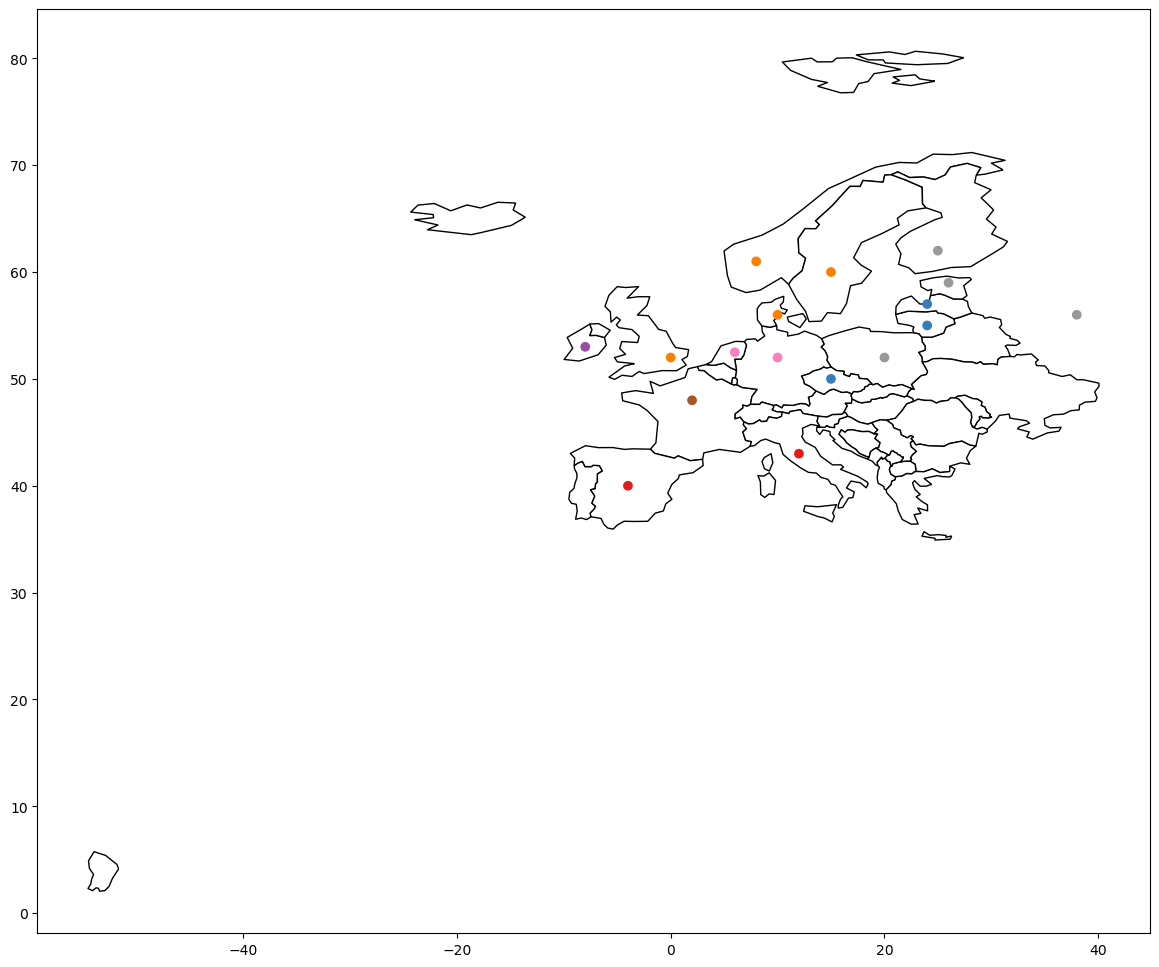

In [111]:
def draw_results():
    gdf_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    filter = ((gdf_world['continent'] == 'Europe') & (gdf_world['name'] != 'Russia')) #Asian part of Russia mess up map

    gdf = gpd.GeoDataFrame(df_visu, geometry=gpd.points_from_xy(df_visu['Longitude'], df_visu['Latitude']))

    ax = gdf_world[filter].plot(figsize=(20, 12), color='white', edgecolor='black')
    gdf.plot(column='Cluster', categorical=True, cmap='Set1', ax=ax, marker='o' )

draw_results()

# Internal Validation

## Cohesion and separation
### Cohesion
#### Principle:
Cohesion for a cluster can be computed by summating the similarity between each pair of records contained in that cluster.

In [112]:
def calc_sum_similarities(a, b):
    ret_val = 0
    for i in range(0, len(a)): #iterate thru all elements and sum up similarities
        if (a[i] == b[i]): ret_val += 1
        # print(f'{a[i]} - {b[i]} : {ret_val}')
    return ret_val

clusters = range(model_config['k'])
cohesions = []
cluster_size = []

for it_cluster in clusters:
    df_cluster = df_result[df_result['Cluster'] == it_cluster].iloc[:,1:] 
    cnt_langs = df_cluster.shape[0] #number of elements in cluster
    # print(cnt_langs)

    sum_similarities = 0

    if cnt_langs == 1:
        sum_similarities = np.nan #only one lang in cluster!
    else:
        sum_similarities = 0
        for i in range(cnt_langs):
            for j in range(i,cnt_langs):
                if (i != j): #no need to compare one language to itself
                    # print(f"compare langauge {i} ({type(i)}) to {j} ({type(j)}): {calc_sum_similarities(df_cluster.iloc[i], df_cluster.iloc[j])}")
                    sum_similarities += calc_sum_similarities(df_cluster.iloc[i], df_cluster.iloc[j])

    # print(f'cohesion for cluster #{it_cluster}: {sum_similarities}')
    cohesions.append(sum_similarities)
    cluster_size.append(cnt_langs)

dict_cont = { 'Cluster' : clusters, 'Cohesion' : cohesions, 'Clustersize' : cluster_size }
             
df_cohesion = pd.DataFrame(dict_cont)
df_cohesion = df_cohesion.set_index('Cluster')

df_cohesion['Avg_Cohesian'] = df_cohesion['Cohesion'] / df_cohesion['Clustersize']

df_cohesion


,Cohesion,Clustersize,Avg_Cohesian
Cluster,,,
0,28.0,2,14.00
1,66.0,3,22.00
2,NaN,1,NaN
3,160.0,4,40.00
4,NaN,1,NaN
5,29.0,2,14.50
6,127.0,4,31.75


### Separation
#### Principle
- Calculate centroid for each cluster
- Calculate hamming distance of cluster to centroids of other cluster

#### Centroid
Centroids can taken from kModes' trained model. Distance in a categorical model is Hamming distance (as Euclidian distance is not applicable)

In [113]:
df_centroids = pd.DataFrame(kmode.cluster_centroids_, columns= df_result.columns[1:])
df_centroids

,53A,97A,87A,83A,82A,81A,95A,138A,112A,85A,...,86A,96A,69A,51A,26A,72A,37A,92A,33A,101A
0,7.0,4.0,2.0,2.0,3.0,2.0,4.0,2.0,2.0,2.0,...,2.0,4.0,2.0,9.0,2.0,4.0,1.0,6.0,2.0,2.0
1,7.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,1.0,2.0,...,1.0,4.0,4.0,1.0,3.0,4.0,5.0,1.0,2.0,2.0
2,7.0,4.0,2.0,2.0,2.0,3.0,4.0,2.0,2.0,2.0,...,2.0,4.0,4.0,5.0,4.0,1.0,1.0,1.0,6.0,6.0
3,7.0,3.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0,...,1.0,4.0,2.0,1.0,2.0,4.0,3.0,6.0,2.0,1.0
4,7.0,4.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0,...,2.0,4.0,2.0,7.0,2.0,4.0,1.0,1.0,2.0,1.0
5,6.0,5.0,1.0,3.0,1.0,7.0,5.0,2.0,2.0,2.0,...,2.0,5.0,2.0,1.0,2.0,4.0,1.0,6.0,2.0,1.0
6,7.0,3.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,...,2.0,4.0,2.0,1.0,2.0,1.0,5.0,3.0,2.0,1.0


In [114]:
#Calculate disimilarity aka. Hamming distance for two centroids (lines from dataframe shown above)
def calc_hamming_distance(a, b):
    ret_val = 0
    for i in range(0, len(a)):
        if (a[i] != b[i]): ret_val += 1

    return ret_val

centroids = range(0,model_config['k'])
dict_cont = {'Cluster' : centroids} #will be used to create dataframe later

for centroid_a in centroids:
    col = []
    for centroid_b in centroids:
        d = np.nan
        if (centroid_a != centroid_b):
            d = calc_hamming_distance(df_centroids.loc[centroid_a], df_centroids.loc[centroid_b])
            # print(f"Distance from centroid {centroid_a} to centroid {centroid_b} = {d}")
        col.append(d)
    dict_cont[centroid_a] = col

df_cluster_distance = pd.DataFrame(dict_cont)
df_cluster_distance = df_cluster_distance.set_index('Cluster')

df_cluster_distance

,0,1,2,3,4,5,6
Cluster,,,,,,,
0,NaN,19.0,16.0,14.0,11.0,17.0,15.0
1,19.0,NaN,19.0,16.0,18.0,23.0,13.0
2,16.0,19.0,NaN,23.0,17.0,25.0,17.0
3,14.0,16.0,23.0,NaN,12.0,10.0,14.0
4,11.0,18.0,17.0,12.0,NaN,14.0,15.0
5,17.0,23.0,25.0,10.0,14.0,NaN,18.0
6,15.0,13.0,17.0,14.0,15.0,18.0,NaN


Calculate the average distance for each centroid to all other centroids to get its separation value.

In [115]:
separation_per_centroid = df_cluster_distance.mean()
df_separation = separation_per_centroid.to_frame(name='Avg_Dist')
df_separation.index.names = ['Cluster']
# df_separation


# Summary
## Cohesion & Separation
### A set of clusters having high cohesion within the clusters and high separation between the clusters is considered to be good.

In [116]:
df_cohesion.join(df_separation, how='inner')

,Cohesion,Clustersize,Avg_Cohesian,Avg_Dist
Cluster,,,,
0,28.0,2,14.00,15.333333
1,66.0,3,22.00,18.000000
2,NaN,1,NaN,19.500000
3,160.0,4,40.00,14.833333
4,NaN,1,NaN,14.500000
5,29.0,2,14.50,17.833333
6,127.0,4,31.75,15.333333


## Results

In [117]:
df_result

,Cluster,53A,97A,87A,83A,82A,81A,95A,138A,112A,...,86A,96A,69A,51A,26A,72A,37A,92A,33A,101A
LANG_ID,,,,,,,,,,,,,,,,,,,,,
rus,6,7.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,...,2.0,4.0,4.0,1.0,2.0,4.0,5.0,3.0,2.0,1.0
cze,1,7.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,1.0,...,3.0,4.0,4.0,1.0,3.0,4.0,5.0,6.0,2.0,2.0
ger,5,6.0,5.0,1.0,3.0,1.0,7.0,5.0,2.0,2.0,...,2.0,5.0,2.0,1.0,2.0,4.0,1.0,6.0,2.0,1.0
iri,2,7.0,4.0,2.0,2.0,2.0,3.0,4.0,2.0,2.0,...,2.0,4.0,4.0,5.0,4.0,1.0,1.0,1.0,6.0,6.0
nor,3,7.0,3.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,...,3.0,4.0,2.0,1.0,2.0,4.0,3.0,6.0,2.0,1.0
ita,0,7.0,4.0,2.0,2.0,3.0,2.0,4.0,2.0,2.0,...,2.0,4.0,2.0,9.0,2.0,4.0,1.0,6.0,2.0,2.0
fre,4,7.0,4.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,...,2.0,4.0,2.0,7.0,2.0,4.0,1.0,1.0,2.0,1.0
fin,6,7.0,3.0,1.0,2.0,1.0,2.0,3.0,2.0,3.0,...,1.0,4.0,2.0,1.0,2.0,1.0,5.0,3.0,2.0,6.0
swe,3,7.0,3.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,...,1.0,4.0,2.0,9.0,2.0,4.0,3.0,6.0,2.0,1.0


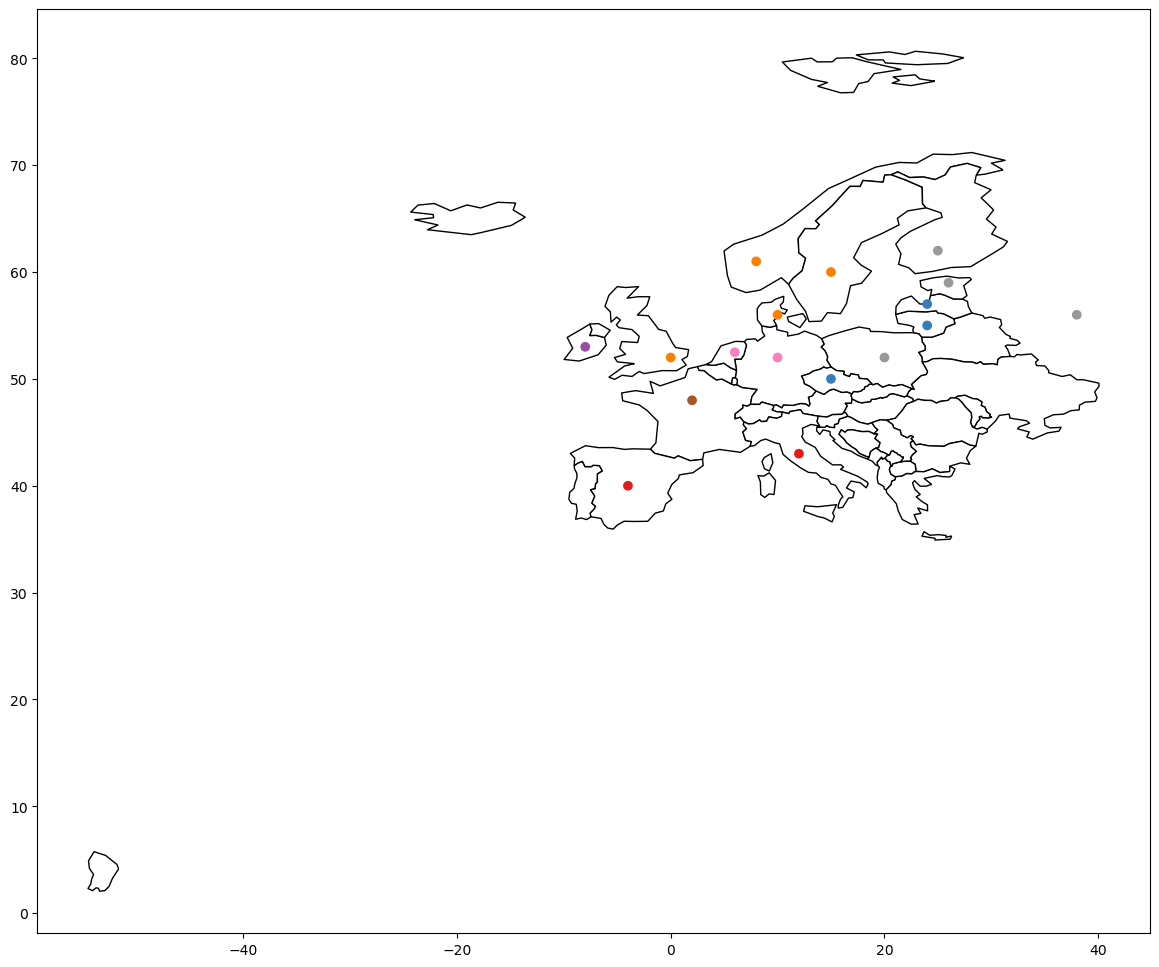

In [118]:
draw_results()